In [18]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


Импорт необходимых библиотек и загрузка данных

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn import preprocessing

df = pd.read_csv('all.csv')

In [75]:
df.head(13) #проверяем загрузился ли датасет и знакомимся с ним

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,...,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,...,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


Очистка и анализ

In [76]:
df.columns #смотрим колонки

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'have_loggia', 'parking_type', 'house_material_type', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'phone',
       'ceiling_height', 'district', 'street', 'house_number', 'underground',
       'residential_complex'],
      dtype='object')

In [77]:
#удаляем лишние колонки
df = df.drop(['author', 'author_type', 'url', 'phone', 'house_number', 'street', 'deal_type', 'residential_complex', 'house_material_type', 'district', 'finish_type'], axis=1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7906 non-null   object
 1   accommodation_type    7906 non-null   object
 2   floor                 7906 non-null   object
 3   floors_count          7906 non-null   object
 4   rooms_count           7906 non-null   object
 5   total_meters          7906 non-null   object
 6   price                 7893 non-null   object
 7   year_of_construction  7906 non-null   object
 8   object_type           7906 non-null   object
 9   have_loggia           7906 non-null   object
 10  parking_type          7906 non-null   object
 11  heating_type          7906 non-null   object
 12  living_meters         7906 non-null   object
 13  kitchen_meters        7906 non-null   object
 14  ceiling_height        7906 non-null   object
 15  underground           5511 non-null   

Очищаем пустые строки

In [79]:
df.dropna(how='all')

,location,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,living_meters,kitchen_meters,ceiling_height,underground
0,Серпухов,flat,6,6,1,20.7,2350000,1917,Вторичка,-1,Наземная,-1,18 м²,1 м²,3 м,NaN
1,Серпухов,flat,1,9,1,33.0,4150000,1975,Вторичка,-1,-1,-1,18 м²,6 м²,"2,7 м",Аннино
2,Серпухов,flat,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,-1,-1,NaN
3,Серпухов,flat,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,-1,-1,NaN
4,Серпухов,flat,4,7,1,25.9,3000000,2009,Вторичка,-1,Наземная,-1,20 м²,5 м²,"3,5 м",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,flat,8,14,2,69.7,11400000,2018,Вторичка,-1,-1,-1,38 м²,"10,5 м²",-1,Медведково
8389,Мытищи,flat,19,25,2,48.1,8607014,2025,Новостройка,-1,Открытая,-1,"22,7 м²","16,1 м²","2,62 м",Ростокино
8390,Мытищи,flat,3,5,2,45.0,7300000,1968,Вторичка,1 балкон,-1,-1,-1,6 м²,-1,Медведково
8391,Мытищи,flat,3,6,2,34.0,6400000,2023,Вторичка,1 балкон,Открытая,-1,19 м²,8 м²,"2,75 м",Медведково


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7906 non-null   object
 1   accommodation_type    7906 non-null   object
 2   floor                 7906 non-null   object
 3   floors_count          7906 non-null   object
 4   rooms_count           7906 non-null   object
 5   total_meters          7906 non-null   object
 6   price                 7893 non-null   object
 7   year_of_construction  7906 non-null   object
 8   object_type           7906 non-null   object
 9   have_loggia           7906 non-null   object
 10  parking_type          7906 non-null   object
 11  heating_type          7906 non-null   object
 12  living_meters         7906 non-null   object
 13  kitchen_meters        7906 non-null   object
 14  ceiling_height        7906 non-null   object
 15  underground           5511 non-null   

"price" колонка должна быть int или float а не object

In [81]:
# Заменяем 'price' на NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Удаляем строки с NaN
df = df.dropna(subset=['price'])

df['price'] = df['price'].astype(float)

df['price'].info()

<class 'pandas.core.series.Series'>
Index: 7892 entries, 0 to 8392
Series name: price
Non-Null Count  Dtype  
--------------  -----  
7892 non-null   float64
dtypes: float64(1)
memory usage: 123.3 KB


<Axes: >

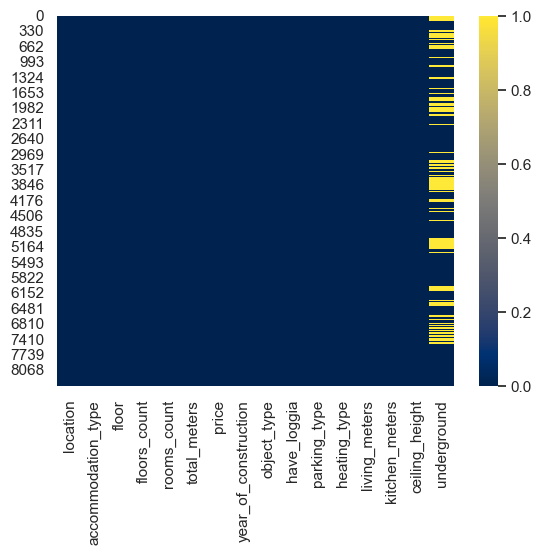

In [82]:
sns.heatmap(df.isnull(),cmap='cividis')

Форматируем данные (18 м² -> 18)

In [83]:
def safe_float_conversion(value):
    if isinstance(value, str):
        # Удаляем лишние символы
        cleaned_value = re.sub(r'[^0-9.-]', '', value)
        try:
            return float(cleaned_value)
        except ValueError:
            return value
    return value

# Применение функции к каждому столбцу]
  
df = df.apply(lambda x: x.apply(safe_float_conversion))
df


,location,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,living_meters,kitchen_meters,ceiling_height,underground
0,Серпухов,flat,6.0,6.0,1.0,20.7,2350000.0,1917.0,Вторичка,-1.0,Наземная,-1.0,18.0,1.0,3.0,NaN
1,Серпухов,flat,1.0,9.0,1.0,33.0,4150000.0,1975.0,Вторичка,-1.0,-1.0,-1.0,18.0,6.0,27.0,Аннино
2,Серпухов,flat,4.0,4.0,1.0,14.0,1700000.0,-1.0,Вторичка,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3,Серпухов,flat,5.0,5.0,1.0,17.5,2500000.0,1968.0,Вторичка,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
4,Серпухов,flat,4.0,7.0,1.0,25.9,3000000.0,2009.0,Вторичка,-1.0,Наземная,-1.0,20.0,5.0,35.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,flat,8.0,14.0,2.0,69.7,11400000.0,2018.0,Вторичка,-1.0,-1.0,-1.0,38.0,105.0,-1.0,Медведково
8389,Мытищи,flat,19.0,25.0,2.0,48.1,8607014.0,2025.0,Новостройка,-1.0,Открытая,-1.0,227.0,161.0,262.0,Ростокино
8390,Мытищи,flat,3.0,5.0,2.0,45.0,7300000.0,1968.0,Вторичка,1.0,-1.0,-1.0,-1.0,6.0,-1.0,Медведково
8391,Мытищи,flat,3.0,6.0,2.0,34.0,6400000.0,2023.0,Вторичка,1.0,Открытая,-1.0,19.0,8.0,275.0,Медведково


Удаляем дубликаты

In [84]:
df = df.drop_duplicates()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7192 non-null   object 
 1   accommodation_type    7192 non-null   object 
 2   floor                 7192 non-null   float64
 3   floors_count          7192 non-null   float64
 4   rooms_count           7192 non-null   float64
 5   total_meters          7192 non-null   float64
 6   price                 7192 non-null   float64
 7   year_of_construction  7192 non-null   object 
 8   object_type           7192 non-null   object 
 9   have_loggia           7192 non-null   float64
 10  parking_type          7192 non-null   object 
 11  heating_type          7192 non-null   float64
 12  living_meters         7192 non-null   float64
 13  kitchen_meters        7192 non-null   float64
 14  ceiling_height        7192 non-null   float64
 15  underground           4989

Приводим 'year_of_construction' к int

In [86]:
# # Функция для проверки, является ли значение числом
# def is_number(value):
#     try:
#         int(value)
#         return True
#     except ValueError:
#         return False

# # Применяем функцию и заменяем нечисловые значения на -1
# df.loc[:, 'year_of_construction'] = df['year_of_construction'].apply(lambda x: int(x) if is_number(x) else -1)

# # Преобразуем столбец в int
# df.loc[:, 'year_of_construction'] = df['year_of_construction'].astype(int)

# Заменяем 'price' на NaN
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')

# Удаляем строки с NaN
df = df.dropna(subset=['year_of_construction'])

df['year_of_construction'] = df['year_of_construction'].astype(int)

# Проверяем тип данных
print(df['year_of_construction'].dtype)  # Должно быть int64

# Выводим уникальные значения
print(df['year_of_construction'].unique())

int64
[1917 1975   -1 1968 2009 1969 1980 1990 1964 2025 2015 1970 1984 1965
 2010 1992 2011 1986 1994 1956 1966 1973 1971 1957 2013 1981 1972 1959
 2004 1962 2019 1978 1977 2003 1963 1952 2024 2007 1995 1976 1982 1953
 2008 2026 2023 1941 1993 2016 2027 2017 2022 1932 2012 1960 2006 1926
 2020 1943 2014 2021 1967 1904 2028 1991 2018 1987 1988 1974 1979 1929
 1989 1985 1930 2005 1958 1996 1940 1948 1961 1938 1997 2002 2001 1999
 1983 1998 1902 2000 1915 1910 1939 1954 1897 1955 1900 1949 1947 1901
 1909 1600 1951 1936 1931 1950 1934 1928 1945 1937 1927 1896 1777 2031
 1935]


/var/folders/h7/3n282g152_x5l_757w1zr7p00000gn/T/ipykernel_20400/771167275.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7142 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7142 non-null   object 
 1   accommodation_type    7142 non-null   object 
 2   floor                 7142 non-null   float64
 3   floors_count          7142 non-null   float64
 4   rooms_count           7142 non-null   float64
 5   total_meters          7142 non-null   float64
 6   price                 7142 non-null   float64
 7   year_of_construction  7142 non-null   int64  
 8   object_type           7142 non-null   object 
 9   have_loggia           7142 non-null   float64
 10  parking_type          7142 non-null   object 
 11  heating_type          7142 non-null   float64
 12  living_meters         7142 non-null   float64
 13  kitchen_meters        7142 non-null   float64
 14  ceiling_height        7142 non-null   float64
 15  underground           4961

Распределение цены по годам

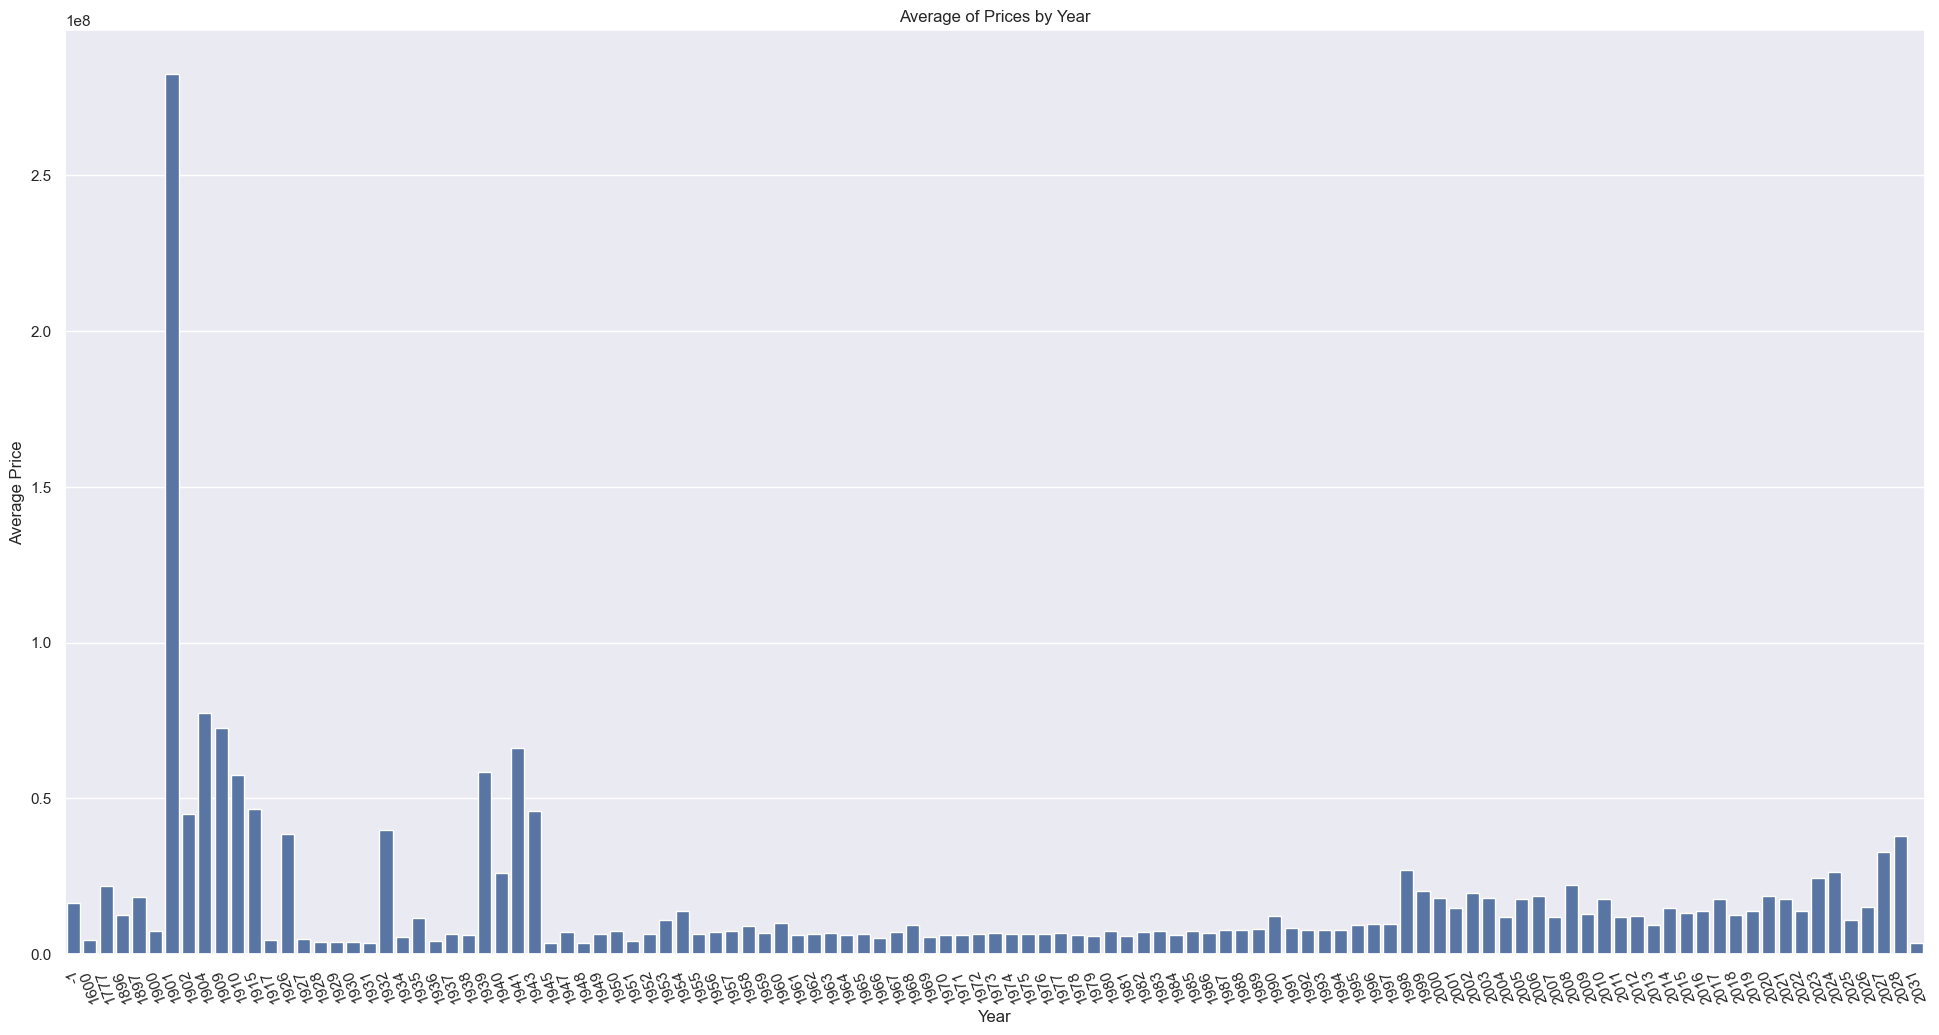

In [88]:
average_prices = df.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

sns.set(style="darkgrid")
plt.figure(figsize=(24, 12))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=110)

plt.show()

In [89]:
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy()  # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result[column].dtype == object:  # если тип столбца - строка, то нужно его закодировать
            # Преобразуем все значения в строки
            result[column] = result[column].astype(str)
            encoders[column] = preprocessing.LabelEncoder()  # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column])  # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,location,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,living_meters,kitchen_meters,ceiling_height,underground
0,26,0,6.0,6.0,1.0,20.7,2350000.0,1917,0,-1.0,2,-1.0,18.0,1.0,3.0,1
1,26,0,1.0,9.0,1.0,33.0,4150000.0,1975,0,-1.0,0,-1.0,18.0,6.0,27.0,14
2,26,0,4.0,4.0,1.0,14.0,1700000.0,-1,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,1
3,26,0,5.0,5.0,1.0,17.5,2500000.0,1968,0,-1.0,0,-1.0,-1.0,-1.0,-1.0,1
4,26,0,4.0,7.0,1.0,25.9,3000000.0,2009,0,-1.0,2,-1.0,20.0,5.0,35.0,1


<Axes: >

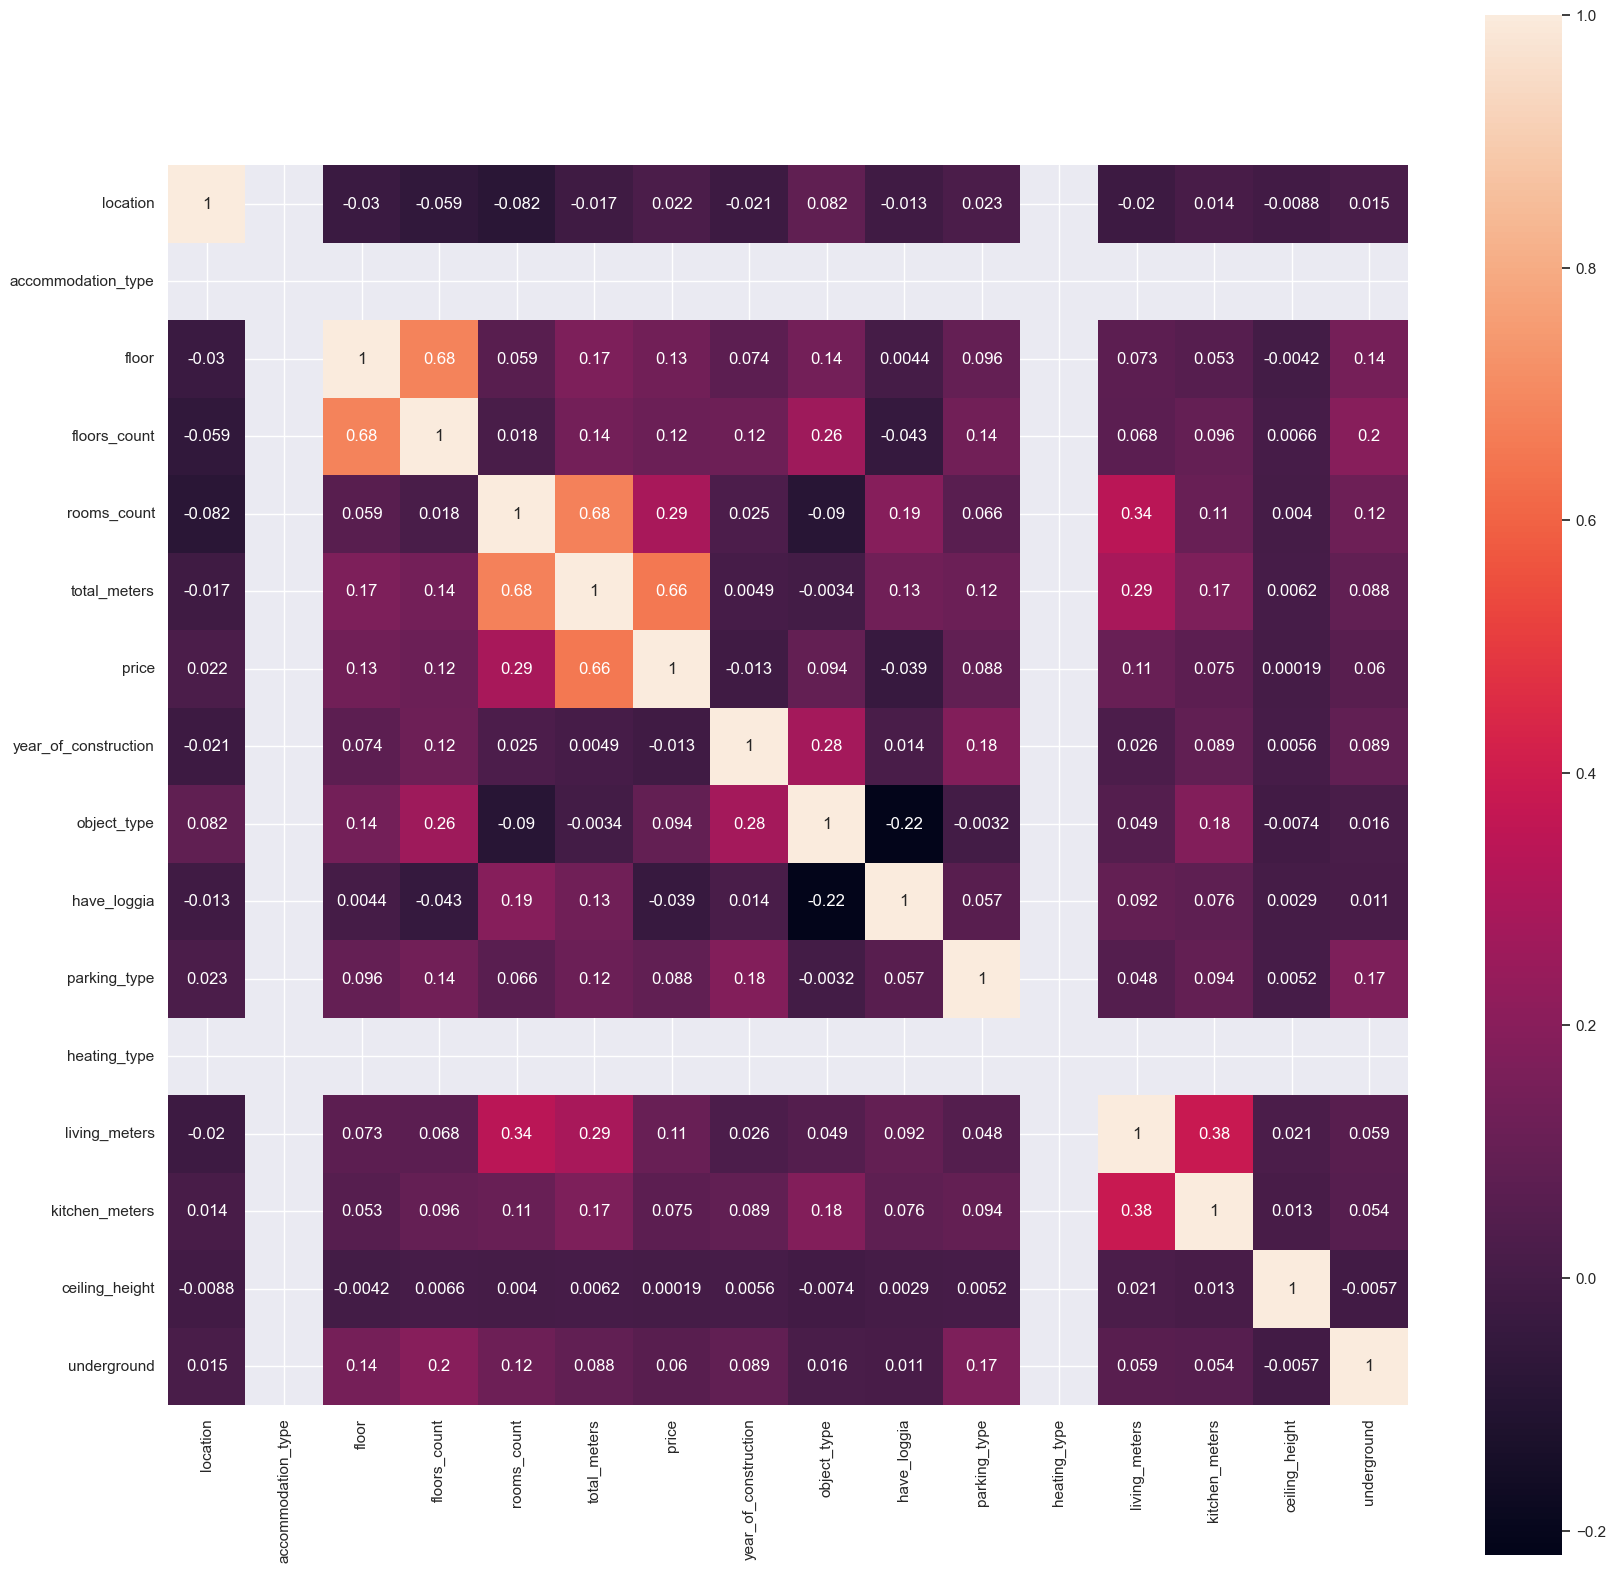

In [90]:
plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)  #можем заметить, что есть пересечения с price и total_meters

Добавим колонку с ценой за квадратный метр

In [91]:
df['price_per_square_meter'] = df['price'] / df['total_meters']
df

,location,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,heating_type,living_meters,kitchen_meters,ceiling_height,underground,price_per_square_meter
0,Серпухов,flat,6.0,6.0,1.0,20.7,2350000.0,1917,Вторичка,-1.0,Наземная,-1.0,18.0,1.0,3.0,NaN,113526.570048
1,Серпухов,flat,1.0,9.0,1.0,33.0,4150000.0,1975,Вторичка,-1.0,-1.0,-1.0,18.0,6.0,27.0,Аннино,125757.575758
2,Серпухов,flat,4.0,4.0,1.0,14.0,1700000.0,-1,Вторичка,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,121428.571429
3,Серпухов,flat,5.0,5.0,1.0,17.5,2500000.0,1968,Вторичка,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,142857.142857
4,Серпухов,flat,4.0,7.0,1.0,25.9,3000000.0,2009,Вторичка,-1.0,Наземная,-1.0,20.0,5.0,35.0,NaN,115830.115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,flat,8.0,14.0,2.0,69.7,11400000.0,2018,Вторичка,-1.0,-1.0,-1.0,38.0,105.0,-1.0,Медведково,163558.106169
8389,Мытищи,flat,19.0,25.0,2.0,48.1,8607014.0,2025,Новостройка,-1.0,Открытая,-1.0,227.0,161.0,262.0,Ростокино,178940.000000
8390,Мытищи,flat,3.0,5.0,2.0,45.0,7300000.0,1968,Вторичка,1.0,-1.0,-1.0,-1.0,6.0,-1.0,Медведково,162222.222222
8391,Мытищи,flat,3.0,6.0,2.0,34.0,6400000.0,2023,Вторичка,1.0,Открытая,-1.0,19.0,8.0,275.0,Медведково,188235.294118
